In [1]:
# using Pkg
# Pkg.generate("model3")

In [2]:
# using Pkg
# Pkg.add("OrdinaryDiffEq")
# Pkg.add("DifferentialEquations")
# Pkg.add("ModelingToolkit")
# Pkg.add("DataDrivenDiffEq")
# Pkg.add("LinearAlgebra")
# Pkg.add("DiffEqSensitivity")
# Pkg.add("Optim")
# Pkg.add("DiffEqFlux")
# Pkg.add("Flux")
# Pkg.add("Plots")
# Pkg.add("DataFrames")
# Pkg.add("GLM")
# Pkg.add("StatsModels")
# Pkg.add("CSV")
# Pkg.add("Interpolations")
# Pkg.add("JLD2")
# Pkg.add("Suppressor")
# Pkg.add("Distributed")
# Pkg.add("ParallelDataTransfer")
# Pkg.add("LaTeXStrings")
# Pkg.add("Statistics")
# Pkg.add("StatsBase")
# Pkg.add("IJuliaBell")

In [3]:
println(@__DIR__)
using Pkg
# Pkg.update()

Pkg.activate(string(@__DIR__, "/model0/Project.toml"))
Pkg.status()
Pkg.instantiate()

/home/ziyu/solow/NODE/Neural Ordinary Differential Equations for the Regression and Prediction of Macroeconomics Data under the Green Solow Model/Upload


 Activating environment at `~/solow/NODE/Neural Ordinary Differential Equations for the Regression and Prediction of Macroeconomics Data under the Green Solow Model/Upload/model0/Project.toml`


Project model0 v0.1.0
Status `~/solow/NODE/Neural Ordinary Differential Equations for the Regression and Prediction of Macroeconomics Data under the Green Solow Model/Upload/model0/Project.toml`
  [336ed68f] CSV v0.8.4
  [2445eb08] DataDrivenDiffEq v0.5.5
  [a93c6f00] DataFrames v0.22.5
  [aae7a2af] DiffEqFlux v1.23.0
  [41bf760c] DiffEqSensitivity v6.33.0
  [0c46a032] DifferentialEquations v6.16.0
  [587475ba] Flux v0.11.1
  [38e38edf] GLM v1.4.0
  [a98d9a8b] Interpolations v0.13.1
  [033835bb] JLD2 v0.4.2
  [b964fa9f] LaTeXStrings v1.2.1
  [961ee093] ModelingToolkit v5.11.0
  [429524aa] Optim v1.2.4
  [1dea7af3] OrdinaryDiffEq v5.51.1
  [2dcacdae] ParallelDataTransfer v0.5.0
  [91a5bcdd] Plots v1.6.12
  [2913bbd2] StatsBase v0.33.3
  [3eaba693] StatsModels v0.6.21
  [fd094767] Suppressor v0.2.0
  [9ff05d80] TickTock v1.1.0
  [8ba89e20] Distributed 
  [37e2e46d] LinearAlgebra 
  [10745b16] Statistics 


In [4]:
# cd(@__DIR__)
# using Pkg; Pkg.activate("."); Pkg.instantiate()
# using OrdinaryDiffEq, DifferentialEquations
# using ModelingToolkit
# using DataDrivenDiffEq
# using LinearAlgebra, DiffEqSensitivity, Optim
# using DiffEqFlux, Flux
# using Plots
# using DataFrames, GLM, StatsModels
# using CSV
# using Interpolations
# using JLD2
# using Suppressor
# using Distributed
# using ParallelDataTransfer
# using LaTeXStrings, Statistics
# using StatsBase

using CSV
using DataDrivenDiffEq
using DataFrames
using DiffEqFlux
using DiffEqSensitivity
using DifferentialEquations
using Flux
using GLM
using Interpolations
using JLD2
using ModelingToolkit
using Optim
using OrdinaryDiffEq
using Plots
using StatsModels
using Statistics
using StatsBase

gr()

Plots.GRBackend()

# Cleaning the data and importing parameters

We import the weights and biases of the neural network for Botswana but these just represent a good initialisation point, whcih reduces time for training later on. We find that the parameters for China are good to use for transfer learning of the neural networks for Botswana

In [5]:
# country = "United_States"
country = "Botswana"

loss_summary=DataFrame()
loss_summary[!,"Country"]=["kloss_mse_all","yloss_mse_all","eloss_mse_all",
"kloss_mse_train","yloss_mse_train","eloss_mse_train","kloss_mse_test","yloss_mse_test","eloss_mse_test"]

eqnpara1 = CSV.read(string(@__DIR__,"/model3_initialisation/Eqn1.csv"),normalizenames = true, DataFrame)
eqnpara2 = CSV.read(string(@__DIR__,"/model3_initialisation/Eqn2.csv"),normalizenames = true, DataFrame)
eqnpara3 = CSV.read(string(@__DIR__,"/model3_initialisation/Eqn3.csv"),normalizenames = true, DataFrame)


para1 = eqnpara1[!,"China"]
para2 = eqnpara2[!,"China"]
para3 = eqnpara3[!,"China"]


481-element Array{Float64,1}:
  0.16973944
 -0.52550757
 -0.39584905
  0.16317956
 -0.3047749
 -0.16554157
 -0.4776331
  0.16352679
 -0.11418272
  0.22939694
 -0.049683154
 -0.15432253
  0.047732018
  ⋮
 -0.024548091
 -0.31809312
 -0.24514112
  0.023697559
  0.38112888
 -0.4389049
 -0.42231417
 -0.12987483
 -0.46170348
  0.0036872094
 -0.1835463
 -0.009283389

In [6]:
function getCleandataFrame(country)
    df_year=df[!,"Year"][2:end]
    df1=df[!,string(country,"_yt")]  #GDP
    df2=df[!,string(country,"_kt")] #capital per capita
    df3=df[!,string(country,"_srate")][2:end] # savig rate
    df6= df[!,string(country,"_et")] #population
    df4= df[!,string(country,"_nt")][2:end] #population
    df8=df6[1:end-1] .-df6[2:end]#de
    df6=df6[2:end]
    df5=df2[1:end-1] .-df2[2:end] #dk
    df2=df2[2:end]
    df7= df1[1:end-1] .-df1[2:end] # dydt
    df1=df1[2:end]
    newdf= DataFrame(Year=df_year,yt=df1, k=df2, srate=df3,nt=df4,dkdt=df5,dydt=df7,dedt=df8,et=df6)
    newdf=newdf[completecases(newdf), :]
    return newdf
end

getCleandataFrame (generic function with 1 method)

In [7]:
df = CSV.read(string(@__DIR__, "/compileddf.csv"),
    normalizenames = true, 
    DataFrame)

,Year,Albania_et,Albania_yt,Albania_Popt,Albania_nt,Albania_Ktotal,Albania_kt
,Int64,Float64?,Float64?,Float64,Float64?,Float64?,Float64?
1,1959,missing,missing,1.57133e6,missing,missing,missing
2,1960,1.25819,0.001451,1.62311e6,0.0329562,missing,missing
3,1961,1.37419,0.001463,1.67664e6,0.0329743,missing,missing
4,1962,1.43996,0.001511,1.72814e6,0.0307175,missing,missing
5,1963,1.18168,0.001563,1.77972e6,0.029846,missing,missing
6,1964,1.11174,0.001616,1.83228e6,0.0295379,missing,missing
7,1965,1.1661,0.001675,1.88365e6,0.028035,missing,missing
8,1966,1.33306,0.001738,1.93296e6,0.0261784,missing,missing
9,1967,1.36375,0.001804,1.98406e6,0.0264345,missing,missing


In [8]:
newdf=getCleandataFrame(country)

years_available=size(newdf)[1]
train = collect(1:1:Int(floor(years_available*0.8)))
fore = collect(Int(floor(years_available*0.8))+1:1:years_available)

st = interpolate(newdf[!,"srate"], BSpline(Quadratic(Free(OnCell()))))
nt = interpolate(newdf[!,"nt"], BSpline(Quadratic(Free(OnCell()))))

kdata= newdf[!,"k"]
ydata=newdf[!,"yt"]
edata=newdf[!,"et"]
kic= newdf[!,"k"][1]
yic=newdf[!,"yt"][1]
eic=newdf[!,"et"][1]
    
et = interpolate(edata, BSpline(Quadratic(Free(OnCell()))));
kt = interpolate(kdata, BSpline(Quadratic(Free(OnCell()))));
yt = interpolate(ydata, BSpline(Quadratic(Free(OnCell()))));
kk = map(kt,1:years_available);
yy = map(yt,1:years_available);
ee = map(et,1:years_available);
dk = kk[1:end-1] .-  kk[2:end]
dydt = yy[1:end-1] .-  yy[2:end]
dedt = ee[1:end-1] .-  ee[2:end]
theta=[]

newdf

,Year,yt,k,srate,nt,dkdt,dydt,dedt
,Int64,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?
1,1975,0.001223,0.00408493,0.202551,0.0488591,-0.000141476,7.7e-5,-0.129126
2,1976,0.001381,0.00404858,0.216694,0.0520614,3.63524e-5,-0.000158,-0.519256
3,1977,0.001358,0.00402169,0.222357,0.0542297,2.68853e-5,2.3e-5,-0.204174
4,1978,0.001537,0.00407305,0.227837,0.0521772,-5.13577e-5,-0.000179,-0.0242368
5,1979,0.001613,0.00424262,0.298039,0.0490789,-0.00016957,-7.6e-5,-0.0894769
6,1980,0.001765,0.00457454,0.286999,0.0439067,-0.000331921,-0.000152,-0.00922081
7,1981,0.001858,0.00477105,0.278738,0.0377156,-0.000196508,-9.3e-5,0.0147756
8,1982,0.001921,0.00494978,0.266413,0.0387538,-0.000178735,-6.3e-5,-0.0586634
9,1983,0.002144,0.00482787,0.29919,0.0374656,0.000121908,-0.000223,0.108086


# Finding consistent parameters

Find consistent parameters among the three equations using the Nelder Mead method. These parameters are not optimal. 

In [9]:
function eqn_1(α,θ)
    income = (1-θ).* kdata.^ (α)
   return income
end

function exp_2_eqn2_mse(δ,gᵦ)
    len= length(theta)
    θ = theta[len]
    dkdt = newdf[!,"srate"] .* newdf[!,"yt"] .- (δ .+ newdf[!,"nt"] .+ gᵦ) .* newdf[!,"k"]
    return dkdt 
end

function exp2_eqn1_loss_mse(x)
    α = x[1]
    θ = x[2]
    pred= eqn_1(α,θ)
    return Flux.mse(newdf[!,"yt"], pred)
end

function exp2_eqn2_loss_mse(y)
    δ = y[1]
    gᵦ = y[2]
    pred= exp_2_eqn2_mse(δ,gᵦ)
    return Flux.mse(dk, pred[2:end])
end

    optimizer1 = optimize(exp2_eqn1_loss_mse, [0.0,0.0])
    α,θ = Optim.minimizer(optimizer1)
    push!(theta, θ)
    optmizer2=optimize(exp2_eqn2_loss_mse, [0.0,0.0])
    δ, gᵦ=Optim.minimizer(optmizer2)

function soloweqn3alt(gₐ)
de = edata[2:end] .* (-gₐ .+ dydt ./ ydata[2:end])
end

function losseqn3(xx)
    gₐ = xx
    pred= soloweqn3alt(gₐ)
    return Flux.mse(dedt, pred)
end

reseqn3 = optimize(losseqn3, -200.0, 200.0)
gₐ = Optim.minimizer(reseqn3) 

p123 = Float64[θ,δ,gᵦ,α,gₐ]
ann = FastChain(FastDense(1, 12, tanh),FastDense(12, 12, tanh),
    FastDense(12, 1)) 
ann12 = FastChain(FastDense(1, 12, tanh),FastDense(12,12, tanh),
    FastDense(12, 1)) 
ann123 = FastChain(FastDense(1, 12, tanh),FastDense(12,12, tanh),
    FastDense(12, 1)) 



(::FastChain{Tuple{FastDense{typeof(tanh),DiffEqFlux.var"#initial_params#130"{typeof(Flux.glorot_uniform),typeof(Flux.zeros),Int64,Int64}},FastDense{typeof(tanh),DiffEqFlux.var"#initial_params#130"{typeof(Flux.glorot_uniform),typeof(Flux.zeros),Int64,Int64}},FastDense{typeof(identity),DiffEqFlux.var"#initial_params#130"{typeof(Flux.glorot_uniform),typeof(Flux.zeros),Int64,Int64}}}}) (generic function with 1 method)

In [10]:
p123 =  Float64[0.02680426502431278, -0.045027129714276595, 0.04616730802149254, -0.035365190287845974]

4-element Array{Float64,1}:
  0.02680426502431278
 -0.045027129714276595
  0.04616730802149254
 -0.035365190287845974

# Optimising the neural network

## First neural network for kt

In [11]:
kic= newdf[!,"k"][1]


function solownneqn1(du,u,nnp,t)
#     println("t is", t)
sₜ = st(t) #savings rate
nₜ = nt(t)
yₜ = yt(t)    
α,δ,gᵦ,gₐ = p123
k = u[1]
nn = ann(t,nnp)[1]    
du[1] = sₜ*yₜ-((δ+nₜ+gᵦ)*k * nn) # rate of change of kt
    return du
end

function predict1(θ)
    Array(solve(prob_solownneqn1, Tsit5(), u0=u01, p=θ,abstol=1e-4, reltol=1e-4, saveat = nntsteps))
end

function loss1(θ)
    pred = predict1(θ)
    Flux.mse(kdata,pred), pred 
end

const losses1 = []
callback(θ,l,pred) = begin
    push!(losses1, l)
    false
end

nntspan = (1.0e0,Float64(years_available)) ## the year is hard coded, to be changed later
nndatasize = Int(years_available)
nntsteps = range(nntspan[1], nntspan[2], length=nndatasize)

nnp1 = Array(para1)
u01 = Float32[kic]
prob_solownneqn1 = ODEProblem(solownneqn1, u01, nntspan, nnp1)
nnsolution = solve(prob_solownneqn1, TRBDF2(),p=nnp1, abstol=1e-4, reltol=1e-4, saveat = nntsteps)
res1= DiffEqFlux.sciml_train(loss1, nnp1, ADAM(0.05),cb=callback, maxiters=100)
res1= DiffEqFlux.sciml_train(loss1, res1.minimizer, ADAM(0.01),cb=callback, maxiters=100)
res1= DiffEqFlux.sciml_train(loss1, res1.minimizer, ADAM(0.001),cb=callback, maxiters=100)

function group_years(year, residual)
nntspan = (year,Float64(years_available)) ## the year is hard coded, to be changed later
nndatasize = Int(years_available-year)
nntsteps = range(nntspan[1], nntspan[2], length=nndatasize+1)
    print(nntsteps)
u01_1 = Float32[kdata[year]]
    function loss_group(θ)
        pred = predict1(θ)
        Flux.mse(kdata[year:years_available],pred[year:years_available]), pred[year:years_available] 
    end
prob_solownneqn1 = ODEProblem(solownneqn1, u01_1, nntspan, residual.minimizer)
nnsolution = solve(prob_solownneqn1, Tsit5(),p=residual.minimizer, abstol=1e-4, reltol=1e-4, saveat = nntsteps)
if year == 30
        while ((mean(losses1[end-100:end-50])>=(1.001*mean(losses1[end-49:end]))) || std(losses1[end-49:end]) >=0.001) && length(losses1) <3000
        residual= DiffEqFlux.sciml_train(loss_group, residual.minimizer, ADAM(0.0001),cb=callback, maxiters=200)
        try
            residual= DiffEqFlux.sciml_train(loss_group, residual.minimizer, BFGS(initial_stepnorm=0.000001/100),cb=callback, maxiters=100)
        catch e
            print("Problematics")
            residual= DiffEqFlux.sciml_train(loss_group, residual.minimizer, ADAM(0.0001),cb=callback, maxiters=100)
        end
        residual= DiffEqFlux.sciml_train(loss_group, residual.minimizer, ADAM(0.00001),cb=callback, maxiters=100)
        try
            residual= DiffEqFlux.sciml_train(loss_group, residual.minimizer, BFGS(initial_stepnorm=0.000001/100),cb=callback, maxiters=100)
        catch e
            residual= DiffEqFlux.sciml_train(loss_group, residual.minimizer, ADAM(0.00001),cb=callback, maxiters=100)
            print("Problematics")
        end  
        end
else
    residual= DiffEqFlux.sciml_train(loss_group, residual.minimizer, ADAM(0.001),cb=callback, maxiters=150)
    try
        residual= DiffEqFlux.sciml_train(loss_group, residual.minimizer, BFGS(initial_stepnorm=0.001),cb=callback, maxiters=150)
    catch e
        residual= DiffEqFlux.sciml_train(loss_group, residual.minimizer, ADAM(0.0001),cb=callback, maxiters=150)
        print("Unable to train with BFGS (instability)")
    end
        
end 
    return residual
end

#training over a group of years and slowly expanding the group of years
res1 = group_years(20, res1)
res1 = group_years(15, res1)
res1 = group_years(10, res1)
res1 = group_years(5, res1)



loss: 9.9e-05: 100%|████████████████████████████████████| Time: 0:00:20
loss: 9.74e-05: 100%|███████████████████████████████████| Time: 0:00:17
loss: 9.71e-05: 100%|███████████████████████████████████| Time: 0:00:18


20.0:1.0:34.0

loss: 1.71e-05: 100%|███████████████████████████████████| Time: 0:00:27


15.0:1.0:34.0

loss: 1.1e-05: 100%|████████████████████████████████████| Time: 0:00:27


10.0:1.0:34.0

loss: 3.35e-06: 100%|███████████████████████████████████| Time: 0:00:25


5.0:1.0:34.0

loss: 1.59e-06: 100%|███████████████████████████████████| Time: 0:00:25


 * Status: failure (line search failed)

 * Candidate solution
    Final objective value:     1.612314e-06

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 2.92e-07 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.66e-07 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.01e-07 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 6.24e-02 ≰ 0.0e+00
    |g(x)|                 = 3.97e-05 ≰ 1.0e-08

 * Work counters
    Seconds run:   14  (vs limit Inf)
    Iterations:    5
    f(x) calls:    131
    ∇f(x) calls:   131


In [12]:
res1_1 = res1

nntspan = (1,Float64(years_available)) ## the year is hard coded, to be changed later
nndatasize = Int(years_available)
nntsteps = range(nntspan[1], nntspan[2], length=nndatasize+1)
    function loss_1(θ)
        pred = predict1(θ)
        Flux.mse(kdata[1:years_available],pred[1:years_available]), pred[1:years_available] 
    end
prob_solownneqn1 = ODEProblem(solownneqn1, u01, nntspan, res1_1.minimizer)
nnsolution = solve(prob_solownneqn1, Tsit5(),p=res1_1.minimizer, abstol=1e-4, reltol=1e-4, saveat = nntsteps)

res1_1= DiffEqFlux.sciml_train(loss_1, res1_1.minimizer, ADAM(0.1),cb=callback, maxiters=200)
res1_1= DiffEqFlux.sciml_train(loss_1, res1_1.minimizer, BFGS(initial_stepnorm=0.1),cb=callback, maxiters=200)
res1_1= DiffEqFlux.sciml_train(loss_1, res1_1.minimizer, ADAM(0.01),cb=callback, maxiters=200)
res1_1= DiffEqFlux.sciml_train(loss_1, res1_1.minimizer, BFGS(initial_stepnorm=0.01),cb=callback, maxiters=200)
res1_1= DiffEqFlux.sciml_train(loss_1, res1_1.minimizer, ADAM(0.001),cb=callback, maxiters=200)
res1_1= DiffEqFlux.sciml_train(loss_1, res1_1.minimizer, BFGS(initial_stepnorm=0.001),cb=callback, maxiters=200)
res1_1= DiffEqFlux.sciml_train(loss_1, res1_1.minimizer, ADAM(0.0001),cb=callback, maxiters=200)


loss: 0.000103: 100%|███████████████████████████████████| Time: 0:00:41
loss: 6.23e-07: 100%|███████████████████████████████████| Time: 0:00:40
loss: 4.65e-07: 100%|███████████████████████████████████| Time: 0:00:39
loss: 4.53e-07: 100%|███████████████████████████████████| Time: 0:00:40


 * Status: success

 * Candidate solution
    Final objective value:     4.534932e-07

 * Found with
    Algorithm:     ADAM

 * Convergence measures
    |x - x'|               = NaN ≰ 0.0e+00
    |x - x'|/|x'|          = NaN ≰ 0.0e+00
    |f(x) - f(x')|         = NaN ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = NaN ≰ 0.0e+00
    |g(x)|                 = NaN ≰ 0.0e+00

 * Work counters
    Seconds run:   40  (vs limit Inf)
    Iterations:    200
    f(x) calls:    200
    ∇f(x) calls:   200


In [13]:
println(range(nntspan[1], nntspan[2], length=nndatasize))
for i in range(nntspan[1], nntspan[2], length=nndatasize)
    println(i, ann(i,res1.minimizer))
end

1.0:1.0:34.0
1.0[-3.237971892646931]
2.0[0.8164657428047617]
3.0[3.055342439113602]
4.0[3.6924363323647937]
5.0[3.7371934360115033]
6.0[3.6005441389673267]
7.0[3.4095528009650433]
8.0[3.2029264912966284]
9.0[2.992863273428488]
10.0[2.7836367569966125]
11.0[2.5771401852576954]
12.0[2.3745273391774386]
13.0[2.1766881369448]
14.0[1.9843782214475465]
15.0[1.7982478957382284]
16.0[1.6188440660879568]
17.0[1.4466073165605913]
18.0[1.281870601980093]
19.0[1.1248611691285166]
20.0[0.9757057119305658]
21.0[0.8344382069615848]
22.0[0.7010096916776916]
23.0[0.5752992277759827]
24.0[0.4571253572077206]
25.0[0.34625746892968007]
26.0[0.2424266246036434]
27.0[0.14533552278585588]
28.0[0.0546674013301815]
29.0[-0.029906220419610274]
30.0[-0.10871897753473475]
31.0[-0.1821042320805561]
32.0[-0.2503907008155129]
33.0[-0.3138990324156217]
34.0[-0.37293921726348905]


## Second neural network for yt

In [14]:
ann12 = FastChain(FastDense(1, 12, tanh),FastDense(12,12, tanh),
    FastDense(12, 1)) 

function solownneqn12(du,u,nnp,t)
sₜ = st(t) #savings rate
nₜ = nt(t)
kₜ = kt(t)
yₜ = yt(t)    
    α,δ,gᵦ,gₐ = p123
k,y = u
z = ann(t,res1_1.minimizer)
nn = ann12(t,nnp)    
du[1] = sₜ*yₜ-((δ+nₜ+gᵦ)*k * z[1]) # rate of change of kt
du[2] = y*(gᵦ+α*du[1]/kₜ* nn[1])# rate of change of yt
    return du
end

function predict2(θ)
    Array(concrete_solve(prob_solownneqn12, TRBDF2(), u02, θ, saveat = nntsteps,
                         abstol=1e-4, reltol=1e-4))
end

function loss2(θ)
    pred = predict2(θ)
    sum(abs2, (ydata .- pred[2,:])), pred
end

losses2 = []
callback(θ,l,pred) = begin
    push!(losses2, l)
    false
end

nnp2 = Array(para2)
nntspan = (1.0e0,Float64(years_available)) ## the year is hard coded, to be changed later
nndatasize = Int(years_available)
nntsteps = range(nntspan[1], nntspan[2], length=nndatasize)
u02 = Float32[kic,yic] 
prob_solownneqn12 = ODEProblem(solownneqn12, u02, nntspan, nnp2)
nnsolution2 = solve(prob_solownneqn12, TRBDF2(),p=nnp2, abstol=1e-4, reltol=1e-4, saveat = nntsteps)

res2= DiffEqFlux.sciml_train(loss2, nnp2, ADAM(0.0001),cb=callback, maxiters=100)

println(ann(1,res1.minimizer), ann12(1, res2.minimizer))

loss: 6.92e-06: 100%|███████████████████████████████████| Time: 0:00:44


[-3.237971892646931][-0.022104834998665494]


In [15]:
# res2= DiffEqFlux.sciml_train(loss2, nnp2, ADAM(0.0001),cb=callback, maxiters=100)

while ((mean(losses2[end-100:end-50])>=(1.001*mean(losses2[end-49:end]))) || std(losses2[end-49:end]) >=0.001) && length(losses2) <3000

res2= DiffEqFlux.sciml_train(loss2, res2.minimizer, ADAM(0.0001),cb=callback, maxiters=200)
try
    res2= DiffEqFlux.sciml_train(loss2, res2.minimizer, BFGS(initial_stepnorm=0.000001/100),cb=callback, maxiters=100)

catch e
    print("Problematics")
    res2= DiffEqFlux.sciml_train(loss2, res2.minimizer, ADAM(0.0001),cb=callback, maxiters=100)
end
res2= DiffEqFlux.sciml_train(loss2, res2.minimizer, ADAM(0.00001),cb=callback, maxiters=100)
try
    res2= DiffEqFlux.sciml_train(loss2, res2.minimizer, BFGS(initial_stepnorm=0.000001/100),cb=callback, maxiters=100)
catch e
    res2= DiffEqFlux.sciml_train(loss2, res2.minimizer, ADAM(0.00001),cb=callback, maxiters=100)
    print("Problematics")
end

end

loss: 6.47e-06: 100%|███████████████████████████████████| Time: 0:01:31
loss: 6.37e-06: 100%|███████████████████████████████████| Time: 0:00:46


## Third neural network for et

In [16]:
function solownneqn123ic(du,u,nnp,t)
sₜ = st(t) #savings rate
nₜ = nt(t)

    
    α,δ,gᵦ,gₐ = p123
k,y,e = u

nn = ann123(t,nnp) 
zk = ann(t,res1_1.minimizer)
zy = ann12(t,res2.minimizer) 


du[1] = sₜ*y-((δ+nₜ+gᵦ)*k * zk[1]) # rate of change of kt
du[2] = y*(gᵦ+α*du[1]/k * zy[1])
du[3] = e*(-gₐ+du[2]/y) * nn[1]

    return du
end
function predict3(θ)
    Array(concrete_solve(prob_solownneqn123, TRBDF2(), u03, θ, saveat = nntsteps123,
                         abstol=1e-4, reltol=1e-4))
end

function loss3(θ)
    pred = predict3(θ)
    sum(abs2, (edata .- pred[3,:])), pred
end

const losses3 = []
callback(θ,l,pred) = begin
    push!(losses3, l)
    false
end   

nnp3 = Array(para3)
nntspan = (1.0e0,Float64(years_available)) ## the year is hard coded, to be changed later
    nndatasize = Int(years_available)
    nntsteps123 = range(nntspan[1], nntspan[2], length=nndatasize)
    u03 = Float32[kic,yic,eic] 
prob_solownneqn123 = ODEProblem(solownneqn123ic, u03, nntspan, nnp3)
nnsolution = solve(prob_solownneqn123, TRBDF2(),p=nnp3, abstol=1e-4, reltol=1e-4, saveat = nntsteps)

res= DiffEqFlux.sciml_train(loss3, nnp3, ADAM(0.0001),cb=callback, maxiters=100)

while ((mean(losses3[end-100:end-50])>=(1.001*mean(losses3[end-49:end]))) || std(losses3[end-49:end]) >=0.001) && length(losses3) <3000
        
        res= DiffEqFlux.sciml_train(loss3, res.minimizer, ADAM(0.0001),cb=callback, maxiters=200)
        try
            res= DiffEqFlux.sciml_train(loss3, res.minimizer, BFGS(initial_stepnorm=0.000001/100),cb=callback, maxiters=100)

        catch e
            print("Problematics")
            res= DiffEqFlux.sciml_train(loss3, res.minimizer, ADAM(0.0001),cb=callback, maxiters=100)
        end
        res= DiffEqFlux.sciml_train(loss3, res.minimizer, ADAM(0.00001),cb=callback, maxiters=100)
        try
            res= DiffEqFlux.sciml_train(loss3, res.minimizer, BFGS(initial_stepnorm=0.000001/100),cb=callback, maxiters=100)
        catch e
            res= DiffEqFlux.sciml_train(loss3, res.minimizer, ADAM(0.00001),cb=callback, maxiters=100)
            print("Problematics")
        end
            
        end


loss: 68.8: 100%|███████████████████████████████████████| Time: 0:02:07
loss: 18.4: 100%|███████████████████████████████████████| Time: 0:03:57
loss: 14.4: 100%|███████████████████████████████████████| Time: 0:01:50
loss: 11.4: 100%|███████████████████████████████████████| Time: 0:03:41
loss: 10.2: 100%|███████████████████████████████████████| Time: 0:01:26
loss: 7.88: 100%|███████████████████████████████████████| Time: 0:03:16
loss: 6.79: 100%|███████████████████████████████████████| Time: 0:01:36
loss: 3.77: 100%|███████████████████████████████████████| Time: 0:05:17
loss: 3.03: 100%|███████████████████████████████████████| Time: 0:02:32
loss: 2.9: 100%|████████████████████████████████████████| Time: 0:04:48
loss: 2.89: 100%|███████████████████████████████████████| Time: 0:02:32
loss: 2.83: 100%|███████████████████████████████████████| Time: 0:05:27
loss: 2.83: 100%|███████████████████████████████████████| Time: 0:02:41
loss: 2.78: 100%|███████████████████████████████████████| Time: 

# Plotting a graph

In [17]:
using LaTeXStrings

function plot_graphmodel7(nnpred,country,nntstepsfull,kdata,ydata,edata)
        upscale = 0.9 #8x upscaling in resolution
    fntsm = Plots.font("sans-serif", pointsize=round(12.0*upscale))
    fntlg = Plots.font("sans-serif", pointsize=round(16.0*upscale))
    default(titlefont=fntlg, guidefont=fntlg, tickfont=fntsm, legendfont=fntsm)
    default(size=(550*upscale,400*upscale)) #Plot canvas size
    default(dpi=150)
    
    fctime = collect(Int(floor(size(nntstepsfull,1)*0.8))+1:1:size(nntstepsfull,1)) 
    plotkyenn12ic= Plots.scatter(xaxis=nntstepsfull,nnpred[1:2,:]',
        label=[L"k_{sol}" L"y_{sol}"],color=[:red :blue],legend=(0.102,0.955),
        markershape=[:circle :diamond],markersize=4*upscale,
        ylabel=L"k_t,y_t",right_margin = 15Plots.mm)
            
    plot!(plotkyenn12ic,[kdata,ydata],label=[L"k_{data}" L"y_{data}"],linestyle=[:solid :dash],
        color=[:red :blue],ylim=(0,1.5.*round(maximum(kdata);sigdigits=1)),foreground_color_legend = nothing)

    Plots.scatter!(plotkyenn12ic,fctime,nnpred[1:2,fctime]',
        color=[:red :blue],markershape=[:circle :diamond], markersize=4*upscale,label=nothing) #markersize = 8 for predict

    pr = twinx()
    
    Plots.scatter!(pr,nntstepsfull,nnpred[3,:],
        color=:green,legend=(0.89,0.954), markershape = [:utriangle], markersize=4*upscale, label=nothing)

    Plots.scatter!(pr,fctime,nnpred[3,fctime],
        label=L"e_{sol}",color=:green,legend=(0.89,0.954), markershape = [:utriangle], markersize=4*upscale,
        ylabel=L"e_t",right_margin = 15Plots.mm,
        foreground_color_legend = nothing,background_color_legend = nothing)
            
    plot!(pr,edata,label=L"e_{data}",color=:green,ylim=(0,1.7.*round(maximum(edata);sigdigits=1)),
                linestyle=:dot)
    
    xpts = collect(0:5:5*ceil(length(nntstepsfull)/5))
        xpts[1]=1
    
   plot(plotkyenn12ic,xlabel = "years",xticks=xpts,box=:on,linewidth=2*upscale)

# file_dir1 = @__DIR__
#     savefig(string(file_dir1,"/",country,"model7_190621"))
end



plot_graphmodel7 (generic function with 1 method)

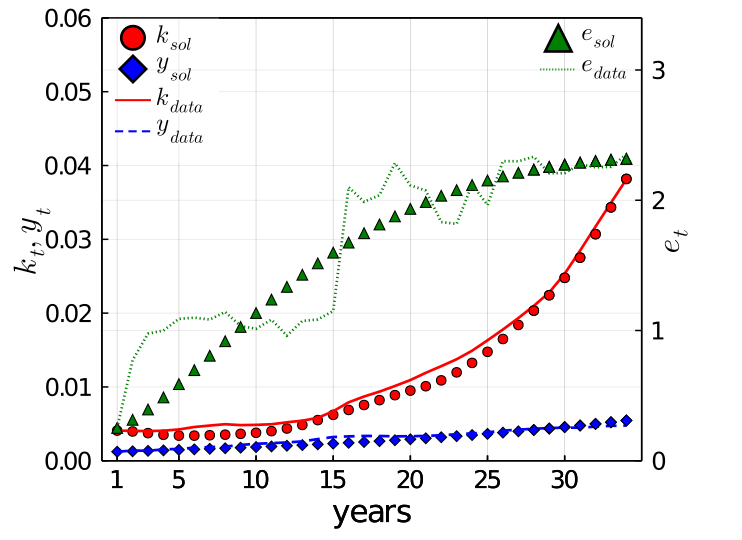

In [18]:

function solownneqn123(du,u,nnp,t)
sₜ = st(t) #savings rate
nₜ = nt(t)
  
    α,δ,gᵦ,gₐ = p123

k,y,e = u

nn = ann123(t,res.minimizer)

zk = ann(t,res1_1.minimizer)
zy = ann12(t,res2.minimizer) 
du[1] = sₜ*y-((δ+nₜ+gᵦ)*k * zk[1]) # rate of change of kt
du[2] = y*(gᵦ+α*du[1]/k * zy[1])
du[3] = e*(-gₐ+du[2]/y) * nn[1]

    return du
end

    nntspan = (1.0e0,years_available*1.0) ## the year is hard coded, to be changed later
    nndatasize = years_available
    nntsteps = range(nntspan[1], nntspan[2], length=nndatasize)
    u0 = Float32[kic,yic,eic] ## kt initial
    prob_solownneqn = ODEProblem(solownneqn123, u0, nntspan)
    pred = solve(prob_solownneqn, TRBDF2(), abstol=1e-4, reltol=1e-4, saveat = nntsteps)

    kmse = Flux.mse(pred[1,:],kdata)
    ymse = Flux.mse(pred[2,:],ydata)
    emse = Flux.mse(pred[3,:],edata)
 kmsetrain = Flux.mse(pred[1,:][train],kdata[train])
    ymsetrain = Flux.mse(pred[2,:][train],ydata[train])
    emsetrain = Flux.mse(pred[3,:][train],edata[train])
        
    kmsefore = Flux.mse(pred[1,:][fore],kdata[fore])
    ymsefore = Flux.mse(pred[2,:][fore],ydata[fore])
    emsefore = Flux.mse(pred[3,:][fore],edata[fore])
    
    loss_summary[!,country] = [kmse,ymse,emse,kmsetrain,ymsetrain,emsetrain,kmsefore,ymsefore,emsefore]
plot_graphmodel7(pred,country,nntsteps,kdata,ydata,edata)


In [19]:
    kmse = Flux.mse(pred[1,:],kdata)
    ymse = Flux.mse(pred[2,:],ydata)
    emse = Flux.mse(pred[3,:],edata)

println(kmse)

1.1586671595278847e-6


# Calculating errors

In [20]:
using StatsBase

Botswana_k_pred = convert(Array{Float64},pred[1,:])
Botswana_y_pred = convert(Array{Float64},pred[2,:])
Botswana_e_pred = convert(Array{Float64},pred[3,:])

kdata = identity.(kdata)
ydata = identity.(ydata)
edata = identity.(edata)

#checking the implementation of MSE
# println("(Botswana Mean Squared Errors) kt: ", Flux.mse(Botswana_k_pred, kdata), 
#     " yt: ", Flux.mse(Botswana_y_pred, ydata), 
#     " et: ", Flux.mse(Botswana_e_pred, edata))
println("(Botswana Mean Squared Errors) kt: ", (sqL2dist(Botswana_k_pred, kdata)/length(kdata)), 
    " yt: ", (sqL2dist(Botswana_y_pred, ydata)/length(ydata)), 
    " et: ", (sqL2dist(Botswana_e_pred, edata)/length(edata)))
println("(Botswana Root Mean Squared Errors) kt: ", (L2dist(Botswana_k_pred, kdata)/length(kdata)), 
    " yt: ", (L2dist(Botswana_y_pred, ydata)/length(ydata)), 
    " et: ", (L2dist(Botswana_e_pred, edata)/length(edata)))
#checking the implementation of MAE
# println("(Botswana Mean Absolute Errors) kt: ", Flux.mae(Botswana_k_pred, kdata), 
#     " yt: ", Flux.mae(Botswana_y_pred, ydata), 
#     " et: ", Flux.mae(Botswana_e_pred, edata))
println("(Botswana Mean Absolute Errors) kt: ", 
    L1dist(convert(Array{Float64},Botswana_k_pred),kdata)/length(kdata), 
    " yt: ", L1dist(convert(Array{Float64},Botswana_y_pred),ydata)/length(ydata), 
    " et: ", L1dist(convert(Array{Float64},Botswana_e_pred),edata)/length(edata))


function r2_impl(data,pred)
tss = sum((data .-mean(data)).^2)
rss = sum((data .-pred).^2)
r2 = 1- rss/tss
return r2  
end
#checking the implementation of R2
# println("(Botswana R2 Correlation Coefficient) yt: ", r2(ols_y_Botswana),
#     " et: ", r2(ols_e_Botswana))
# println("(Botswana R2 Correlation Coefficient) yt: ", r2_impl(Botswana_y_reg[!, :lgyty0], predict(ols_y_Botswana)),
#     " et: ", r2_impl(Botswana_e_reg[!, :lgete0], predict(ols_e_Botswana)))
println("(Botswana R2 Correlation Coefficient) kt: ", r2_impl(kdata, Botswana_k_pred), 
    " yt: ", r2_impl(ydata, Botswana_y_pred), 
    " et: ", r2_impl(edata, Botswana_e_pred))

function Ar2_impl(data,pred, p)
tss = sum((data .-mean(data)).^2)
rss = sum((data .-pred).^2)
r2 = 1- rss/tss
n = size(data)[1]
# ar2 = 1 - (1 - r2)*(n-1)/(n-p-1)
ar2 = 1 - abs((1 - r2)*(n-1)/(n-p))
# using this formula means that the intercept is also counted as a parameter
# this formula requires we be explicit about all parameters
return ar2  
end

#checking the implementation of adjusted R2
# println("(Botswana Adjusted R2) yt: ", adjr2(ols_y_Botswana),
#     " et: ", adjr2(ols_e_Botswana))
# println("(Botswana Adjusted R2) yt: ", Ar2_impl(Botswana_y_reg[!, :lgyty0], predict(ols_y_Botswana),2),
#     " et: ", Ar2_impl(Botswana_e_reg[!, :lgete0], predict(ols_e_Botswana),2))
# for regular regression:
# 3 parameters are coeff of lge, coeff of t, y intercept 
# for k, there are 5 parameters including intercept
# for neural network, there are 412 parameters 
# (should divide by 3 because 412 parameters are used for 3 equations?)
println("(Botswana Adjusted R2) kt: ", Ar2_impl(kdata, Botswana_k_pred, 482), 
    " yt: ", Ar2_impl(ydata, Botswana_y_pred, 482), 
    " et: ", Ar2_impl(edata, Botswana_e_pred, 482))

println("(Botswana Mean Percentage Error) kt: ", mean((kdata.- Botswana_k_pred)./kdata)*100,
    " yt: ", mean((ydata.- Botswana_y_pred)./ydata)*100,
    " et: ", mean((edata.- Botswana_e_pred)./edata)*100)

println("(Botswana Mean Absolute Percentage Error) kt: ", mean(abs.((kdata.- Botswana_k_pred)./kdata))*100,
    " yt: ", mean(abs.((ydata.- Botswana_y_pred)./ydata))*100,
    " et: ", mean(abs.((edata.- Botswana_e_pred)./edata))*100)

println("(Botswana Mean Arctangent Absolute Percentage Error) kt: ", mean(atan.(abs.((kdata.- Botswana_k_pred)./kdata)))*100,
    " yt: ", mean(atan.(abs.((ydata.- Botswana_y_pred)./ydata)))*100,
    " et: ", mean(atan.(abs.((edata.- Botswana_e_pred)./edata)))*100)

println("(Botswana Mean Bias Error) kt: ", mean(kdata.- Botswana_k_pred),
    " yt: ", mean(ydata.- Botswana_y_pred),
    " et: ", mean(edata.- Botswana_e_pred))

function loglikelihood_calc(data,pred)
rss = sum((data .-pred).^2)
n = length(pred)
return -n/2*(log(2pi*rss/n)+1)
end
# implementation from julia: https://github.com/JuliaStats/GLM.jl/blob/950579166c52ff1cbbeab75cbc23235b30640802/src/lm.jl

#checking implementation for loglikelihood
# println("(Botswana Loglikelihood) yt: ", loglikelihood(ols_y_Botswana),
#     " et: ", loglikelihood(ols_e_Botswana))
# println("(Botswana Loglikelihood) yt: ", loglikelihood_calc(Botswana_y_reg[!, :lgyty0], predict(ols_y_Botswana)),
#     " et: ", loglikelihood_calc(Botswana_e_reg[!, :lgete0], predict(ols_e_Botswana)))
println("(Botswana Loglikelihood) kt: ", loglikelihood_calc(kdata, Botswana_k_pred),
    " yt: ", loglikelihood_calc(ydata, Botswana_y_pred),
    " et: ", loglikelihood_calc(edata, Botswana_e_pred))

function aic_calc(data, pred, params)
    L = loglikelihood_calc(data,pred)
    return 2*params-2*L
end

#checking implementation for aic
# println("(Botswana Aikaike Information Criterion) yt: ", aic(ols_y_Botswana),
#     " et: ", aic(ols_e_Botswana))
# println("(Botswana Aikaike Information Criterion) yt: ", aic_calc(Botswana_y_reg[!, :lgyty0], predict(ols_y_Botswana),4),
#     " et: ", aic_calc(Botswana_e_reg[!, :lgete0], predict(ols_e_Botswana),4))
# 4 degrees of freedom in the model: intercept, two coefficients and variance

println("(Botswana Aikaike Information Criterion) kt: ", aic_calc(kdata, Botswana_k_pred, 482),
    " yt: ", aic_calc(ydata, Botswana_y_pred, 482),
    " et: ", aic_calc(edata, Botswana_e_pred, 482))

function aicc_calc(data, pred, params)
    n = length(pred)
    L = loglikelihood_calc(data,pred)
    return -2*L + 2*params + 2*params*(params+1)/(n-params-1)
end

# checking implementation for aicc
# println("(Botswana Corrected AIC) yt: ", aicc(ols_y_Botswana),
#     " et: ", aicc(ols_e_Botswana))
# println("(Botswana Corrected AIC) yt: ", aicc_calc(Botswana_y_reg[!, :lgyty0], predict(ols_y_Botswana),4),
#     " et: ", aicc_calc(Botswana_e_reg[!, :lgete0], predict(ols_e_Botswana),4))
# 4 degrees of freedom in the model: intercept, two coefficients and variance

println("(Botswana Corrected AIC) kt: ", aicc_calc(kdata, Botswana_k_pred, 482),
    " yt: ", aicc_calc(ydata, Botswana_y_pred, 482),
    " et: ", aicc_calc(edata, Botswana_e_pred, 482))

function bic_calc(data, pred, params)
    n = length(pred)
    L = loglikelihood_calc(data,pred)
    return -2*L + params*log(n)
end

# checking implementation for bic_calc
# println("(Botswana Corrected BIC) yt: ", bic(ols_y_Botswana),
#     " et: ", bic(ols_e_Botswana))
# println("(Botswana Corrected BIC) yt: ", bic_calc(Botswana_y_reg[!, :lgyty0], predict(ols_y_Botswana),4),
#     " et: ", bic_calc(Botswana_e_reg[!, :lgete0], predict(ols_e_Botswana),4))
# 4 degrees of freedom in the model: intercept, two coefficients and variance

println("(Botswana BIC) kt: ", bic_calc(kdata, Botswana_k_pred, 482),
    " yt: ", bic_calc(ydata, Botswana_y_pred, 482),
    " et: ", bic_calc(edata, Botswana_e_pred, 482))

(Botswana Mean Squared Errors) kt: 1.1586671595278845e-6 yt: 1.855989960771084e-7 et: 0.0802431636934931
(Botswana Root Mean Squared Errors) kt: 0.00018460348281781465 yt: 7.388365179299067e-5 et: 0.048580788896523903
(Botswana Mean Absolute Errors) kt: 0.0009482766696932485 yt: 0.0003572467354404576 et: 0.22471469245034528
(Botswana R2 Correlation Coefficient) kt: 0.9875606489355192 yt: 0.8434247327456329 et: 0.7813728049386328
(Botswana Adjusted R2) kt: 0.9990837085153396 yt: 0.9884665539745667 et: 0.9838957646494975
(Botswana Mean Percentage Error) kt: 11.2887001239962 yt: 9.397433778599092 et: 4.872273711651289
(Botswana Mean Absolute Percentage Error) kt: 11.295958807461986 yt: 11.814678297880015 et: 17.93707261206583
(Botswana Mean Arctangent Absolute Percentage Error) kt: 11.170416437612609 yt: 11.690034549525974 et: 17.104448810471524
(Botswana Mean Bias Error) kt: 0.0009455086109670931 yt: 0.0002443044934789924 et: 0.062201576252989825
(Botswana Loglikelihood) kt: 184.11617350